In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

vdfx = pd.read_csv("./vivado_matrixmul.csv", index_col=0)
cdfx = pd.read_csv("./catapult_matmul_latency.csv", index_col=0)
cdfx['throughput'] = cdfx['obj1'].min()*1/cdfx['obj1']
vdfx['throughput'] = cdfx['obj1'].min()*1/vdfx['obj1']
cdfx['ff_inv'] = 1/cdfx['ff']
vdfx['ff_inv'] = 1/vdfx['ff']
cdfx['lut_inv'] = 1/cdfx['lut']
vdfx['lut_inv'] = 1/vdfx['lut']
cdfx['1/obj2'] = cdfx['obj2'].min()*1/cdfx['obj2']
vdfx['1/obj2'] = cdfx['obj2'].min()*1/vdfx['obj2']
cdfx['clbUtil'] = cdfx['obj2']/147780
vdfx['clbUtil'] = vdfx['obj2']/147780
# drop columns
cdfx['mem_partition_size'] = cdfx['KNOB_DATA_BLOCK']
vdfx['mem_partition_size'] = 1024/vdfx['KNOB_PARTITION_FACTOR']
cdfx = cdfx.drop(columns=['B'])
cdfx = cdfx.drop(columns=['KNOB_MAT_SIZE'])
cdfx = cdfx.drop(columns=['KNOB_DATA_BLOCK'])
vdfx = vdfx.drop(columns=['KNOB_PARTITION_FACTOR'])

Text(0.5, 1.0, 'Matrix Multiplication Combined Design Space')

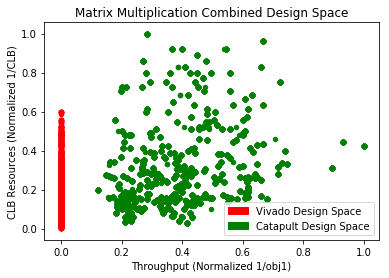

In [25]:
ax1 = vdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='r')
ax = cdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='g', ax=ax1)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Vivado Design Space')
green_data = mpatches.Patch(color='green', label='Catapult Design Space')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput (Normalized 1/obj1)')
plt.ylabel('CLB Resources (Normalized 1/CLB)')
plt.title("Matrix Multiplication Combined Design Space")

In [26]:
print("~~~~~~~~~~~ Area Optimized Designs Averages ~~~~~~~~~~~~\n")
print(cdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\n~~~~~~~~~~~ Latency Optimized Designs Averages ~~~~~~~~~~~~\n")
print(vdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~ Area Optimized Designs Averages ~~~~~~~~~~~~

KNOB_UNROLL_FACTOR1      3.751842
KNOB_UNROLL_FACTOR2      3.751372
KNOB_UNROLL_FACTOR3      3.750118
KNOB_SUBDIM_X            6.196269
KNOB_SUBDIM_Y            6.196896
obj1                     0.000203
obj2                   119.572817
lut                    492.688509
ff                      99.003449
dsp                      1.031196
bram                     0.000000
throughput               0.392153
ff_inv                   0.019678
lut_inv                  0.003226
1/obj2                   0.323173
clbUtil                  0.000809
mem_partition_size     479.031823
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~ Latency Optimized Designs Averages ~~~~~~~~~~~~

KNOB_SUBDIM_X             6.290009
KNOB_SUBDIM_Y             6.273144
KNOB_UNROLL_FACTOR1       3.929789
KNOB_UNROLL_FACTOR2       3.798350
KNOB_UNROLL_FACTOR3       3.713291
obj1                      9.732935
obj2                    578.351971

In [27]:
cdfx = cdfx.reset_index(drop=True)
vdfx = vdfx.reset_index(drop=True)
cv_df = pd.merge(cdfx, vdfx, on=['KNOB_UNROLL_FACTOR1','KNOB_UNROLL_FACTOR2','KNOB_UNROLL_FACTOR3','mem_partition_size', 'KNOB_SUBDIM_X', 'KNOB_SUBDIM_Y'], how='inner')
cv_df.count()

KNOB_UNROLL_FACTOR1    4230
KNOB_UNROLL_FACTOR2    4230
KNOB_UNROLL_FACTOR3    4230
KNOB_SUBDIM_X          4230
KNOB_SUBDIM_Y          4230
obj1_x                 4230
obj2_x                 4230
lut_x                  4230
ff_x                   4230
dsp_x                  4230
bram_x                 4230
throughput_x           4230
ff_inv_x               4230
lut_inv_x              4230
1/obj2_x               4230
clbUtil_x              4230
mem_partition_size     4230
obj1_y                 4230
obj2_y                 4230
lut_y                  4230
ff_y                   4230
dsp_y                  4230
bram_y                 4230
throughput_y           4230
ff_inv_y               4230
lut_inv_y              4230
1/obj2_y               4230
clbUtil_y              4230
dtype: int64

(0, 1)

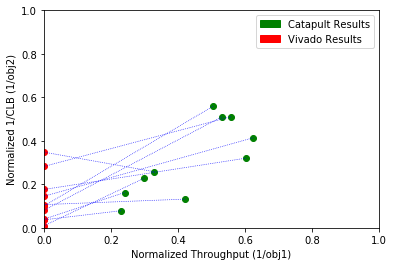

In [28]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample['1/obj2_x'], x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample['1/obj2_y'], x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['1/obj2_x'], row['1/obj2_y']],'b:',linewidth=0.7)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
plt.ylim(0, 1)
plt.xlim(0, 1)

(0, 0.003)

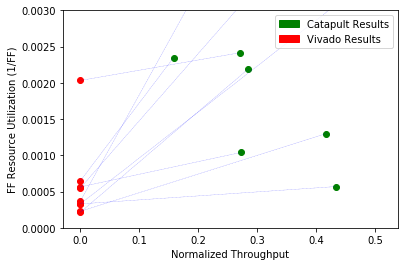

In [29]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample.lut_inv_x, x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample.lut_inv_y, x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['lut_inv_x'], row['lut_inv_y']],'b:',linewidth=0.3)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput')
plt.ylabel('FF Resource Utilization (1/FF)')
plt.ylim(0, 0.003)